## Scan EDA

#### Imports and data cleaning

In [1]:
import networkx as nx
import pandas as pd
import glob
import os
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm
import seaborn as sns
import numpy as np
import matplotlib.lines as mlines


In [3]:
#for each subject create a time series
csv_folder = "..\\..\\data.nosync\\stats"
sub_folders = ["ABIDEI_7","ABIDEII_7","ADHD200_7"]
# Collect all .tsv files
csv_files = []
for folder in sub_folders:
    csv_files = csv_files + glob.glob(os.path.join(os.path.join(csv_folder,folder), "*.csv"))
    #print(glob.glob(os.path.join(os.path.join(csv_folder,folder), "*.csv")))

In [4]:
len(csv_files)

663

#### Plots of region activation over time for 1 participant

..\..\data.nosync\stats\ABIDEI_7\sub-0050952_ses-1_task-rest_run-1_space-MNI152NLin6ASym_desc-preproc_b.csv
sub-0050952_run-1 0050952 ABIDEI_7 

..\..\data.nosync\stats\ABIDEI_7\sub-0050952_ses-1_task-rest_run-1_space-MNI152NLin6ASym_desc-preproc_bold
0.0002782333155803


C:\Users\nici9\AppData\Local\Temp\ipykernel_6212\829737471.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


(1, ROI_1    0.182028
ROI_2    0.019209
ROI_3    0.019362
ROI_4    0.084445
ROI_5   -0.274938
ROI_6    0.005675
ROI_7   -0.123539
Name: 1, dtype: float64)
(2, ROI_1    0.187571
ROI_2    0.035080
ROI_3    0.050639
ROI_4    0.149628
ROI_5   -0.251300
ROI_6    0.154181
ROI_7   -0.100336
Name: 2, dtype: float64)
(3, ROI_1    0.044967
ROI_2   -0.021116
ROI_3    0.014491
ROI_4    0.135639
ROI_5   -0.059886
ROI_6    0.323317
ROI_7    0.030769
Name: 3, dtype: float64)
(4, ROI_1   -0.144064
ROI_2   -0.137557
ROI_3   -0.102204
ROI_4    0.103396
ROI_5    0.117203
ROI_6    0.417261
ROI_7    0.162455
Name: 4, dtype: float64)
(5, ROI_1   -0.252197
ROI_2   -0.202997
ROI_3   -0.239858
ROI_4    0.147539
ROI_5    0.132366
ROI_6    0.382616
ROI_7    0.178905
Name: 5, dtype: float64)
(6, ROI_1   -0.245473
ROI_2   -0.116715
ROI_3   -0.313172
ROI_4    0.260559
ROI_5    0.030666
ROI_6    0.227332
ROI_7    0.079875
Name: 6, dtype: float64)
(7, ROI_1   -0.184528
ROI_2    0.083374
ROI_3   -0.288022
ROI_4    0.3

,ROI_1,ROI_2,ROI_3,ROI_4,ROI_5,ROI_6,ROI_7
1,True,True,True,True,False,True,False
2,True,True,True,True,False,True,False
3,True,False,True,True,False,True,True
4,False,False,False,True,True,True,True
5,False,False,False,True,True,True,True
...,...,...,...,...,...,...,...
172,False,False,True,False,True,True,False
173,False,False,True,False,True,True,False
174,False,False,True,False,True,True,True
175,False,True,False,False,True,True,True


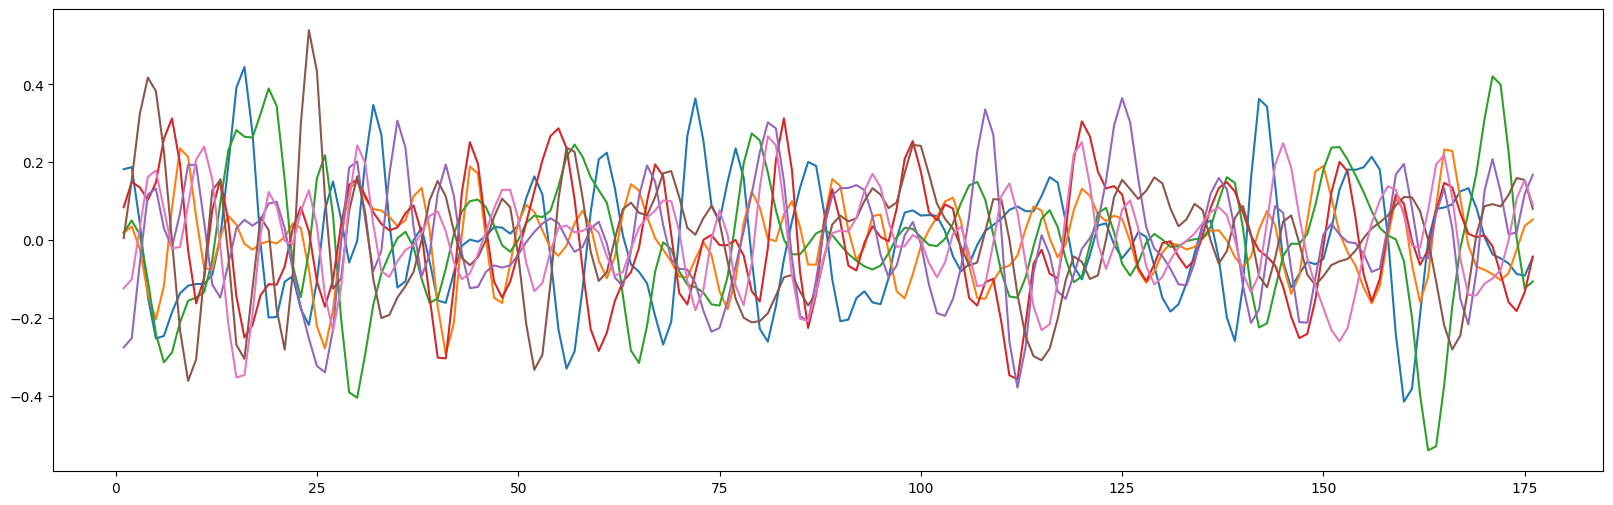

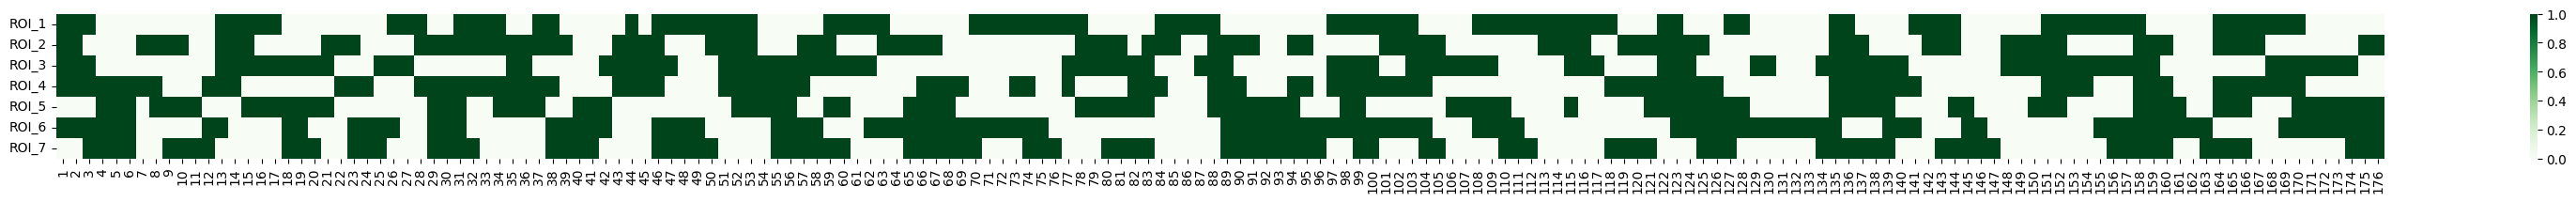

In [13]:
thresholds = pd.read_csv(csv_files[0],index_col= 0, delimiter=";")

for scan in csv_files[1:]:
    print(scan)
    scan_id = os.path.split(scan)[1].replace("_ses-1_task-rest","").replace("_space-MNI152NLin6ASym_desc-preproc_b.csv","")
    scan_thresholds_subject = os.path.split(scan)[1].replace(".csv","old")
    subject = scan_id.replace("sub-","").replace("_run-1","").replace("_run-2","")
    dataset = os.path.split(scan)[0].replace("..\\..\\data.nosync\\stats\\","")

    print(scan_id,subject,dataset, "\n")
    print(scan.replace(".csv","old"))
    scan_thresholds = thresholds[thresholds["Subject"]==scan_thresholds_subject]
    print(scan_thresholds["50th"].values[0])
    scan_df = pd.read_csv(scan,delimiter = ";",index_col = 0)
    
    fig,ax = plt.subplots(figsize= (20,6))
    for roi in scan_df.columns:
        #print([i+1 for i in range(len(scan_df[roi]))])
        #print(scan_df[roi])
        ax.plot(scan_df[roi])
    fig.show()
    oi_scan_df = scan_df>=scan_thresholds["50th"].values[0]

    fig,ax = plt.subplots(figsize= (40,2))

    sns.heatmap(oi_scan_df.T,cmap="Greens")
    for row in scan_df.iterrows():
        print(row)



    break

oi_scan_df

In [7]:
oi_scan_df[roi].values

array([False, False,  True,  True,  True,  True, False, False,  True,
        True,  True,  True, False, False, False, False, False,  True,
        True,  True, False, False,  True,  True,  True, False, False,
       False,  True,  True,  True,  True, False, False, False, False,
       False,  True,  True,  True,  True, False, False, False, False,
        True,  True,  True,  True,  True, False, False, False, False,
        True,  True,  True,  True,  True,  True, False, False, False,
       False,  True,  True,  True,  True,  True,  True, False, False,
       False,  True,  True,  True, False, False, False,  True,  True,
        True,  True, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True, False, False, False,  True,  True, False, False, False,
       False,  True,  True,  True, False, False, False, False, False,
        True,  True,  True,  True, False, False, False,  True,  True,
        True, False,

#### Average Time Active plots 1 participant

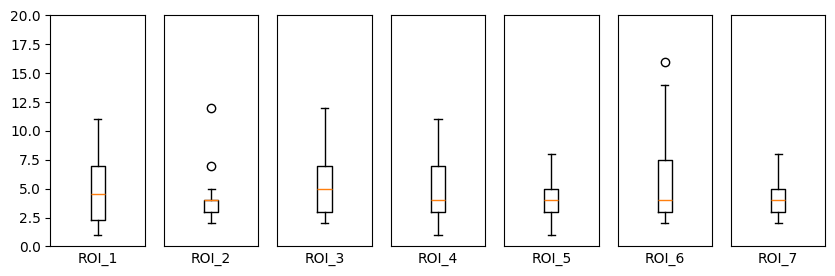

In [19]:
region_times = {i:list() for i in oi_scan_df.columns}
fig,ax = plt.subplots(1,7,figsize = (10,3))
for x,region in enumerate(oi_scan_df.columns):
    counter = 0
    for timestep in oi_scan_df[region]:
        if timestep:
            counter+=1
        else:
            if counter!=0:
                region_times[region].append(counter)
            counter = 0
    ax[x].boxplot(region_times[region])
    ax[x].set_ybound(20)
    ax[x].set_ylim(0)
    ax[x].set_xlabel(region)
    ax[x].set_xticks([])
    if x!=0:
        ax[x].set_yticks([])


In [20]:
for i,u in region_times.items():
    print(i,u)

ROI_1 [3, 5, 3, 4, 2, 1, 8, 5, 9, 5, 7, 11, 2, 2, 2, 4, 8, 7]
ROI_2 [2, 4, 3, 3, 12, 4, 4, 3, 5, 4, 3, 4, 2, 5, 4, 7, 3, 3, 5, 3, 4]
ROI_3 [3, 9, 3, 2, 6, 12, 7, 3, 4, 7, 3, 3, 2, 7, 12, 7]
ROI_4 [8, 3, 3, 11, 4, 7, 4, 2, 1, 3, 3, 2, 8, 9, 7, 4, 3, 7]
ROI_5 [3, 4, 7, 3, 4, 3, 5, 2, 4, 6, 7, 2, 5, 1, 8, 5, 2, 3, 4, 3]
ROI_6 [6, 2, 2, 4, 3, 5, 4, 4, 14, 16, 4, 13, 3, 2, 9]
ROI_7 [4, 4, 3, 3, 4, 4, 5, 6, 6, 3, 4, 8, 2, 2, 3, 4, 3, 6, 5, 5, 4]


<BarContainer object of 7 artists>

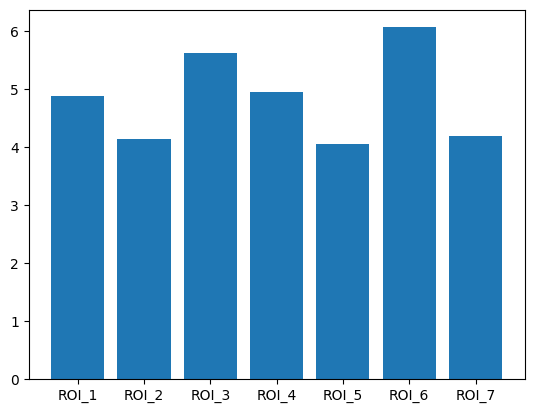

In [21]:
region_av_times = [[key,np.mean(value),np.var(value)] for key,value in region_times.items()]
region_av_times = pd.DataFrame(region_av_times,columns=["ROI","Mean","Var"])
plt.bar(region_av_times["ROI"],region_av_times["Mean"])

<BarContainer object of 7 artists>

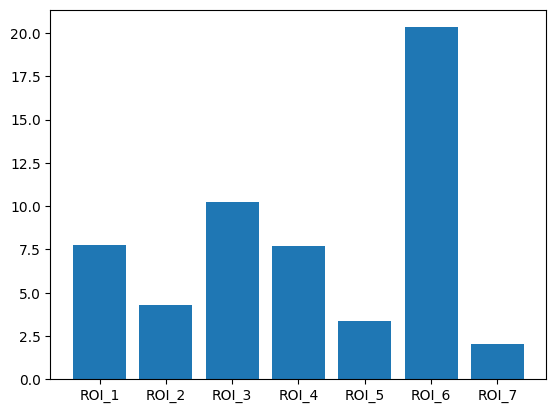

In [22]:

plt.bar(region_av_times["ROI"],region_av_times["Var"])

### for all participants

In [23]:
thresholds = pd.read_csv(csv_files[0],index_col= 0, delimiter=";")
all_scan_dfs = []
for scan in tqdm(csv_files[1:]):
    if "thresholds" in scan:
        print("Switching to other thresholds file")
        thresholds = pd.read_csv(scan,index_col= 0, delimiter=";")
        pass
    scan_id = os.path.split(scan)[1].replace("_ses-1_task-rest","").replace("_space-MNI152NLin6ASym_desc-preproc_b.csv","")
    scan_thresholds_subject = os.path.split(scan)[1].replace(".csv","old")
    subject = scan_id.replace("sub-","").replace("_run-1","").replace("_run-2","")
    dataset_r = os.path.split(scan)[0].replace("..\\..\\data.nosync\\stats\\","")
    dataset = dataset_r.strip("_7").strip("_17")
    scan_thresholds = thresholds[thresholds["Subject"]==scan_thresholds_subject]
    scan_df = pd.read_csv(scan,delimiter = ";",index_col = 0)
    try:
        oi_scan_df = scan_df>=scan_thresholds["50th"].values[0]
        all_scan_dfs.append([subject,oi_scan_df,dataset,dataset_r])

    except:
        print(subject, "not in thresholds, not able to binarise")


len(all_scan_dfs)
all_scan_dfs = pd.DataFrame(all_scan_dfs, columns= ["Participant","Binarised","Dataset","Dataset_r"])
all_scan_dfs["Participant"] = all_scan_dfs["Participant"].astype(int)
all_scan_dfs

 27%|██▋       | 179/662 [00:02<00:06, 74.54it/s]

Switching to other thresholds file
ABIDEII_7_activation_thresholds.csv not in thresholds, not able to binarise


 38%|███▊      | 250/662 [00:03<00:06, 65.92it/s]

Switching to other thresholds file
ADHD200_7_activation_thresholds.csv not in thresholds, not able to binarise


100%|██████████| 662/662 [00:09<00:00, 66.73it/s]


,Participant,Binarised,Dataset,Dataset_r
0,50952,ROI_1 ROI_2 ROI_3 ROI_4 ROI_5 ROI_6 ...,ABIDEI,ABIDEI_7
1,50953,ROI_1 ROI_2 ROI_3 ROI_4 ROI_5 ROI_6 ...,ABIDEI,ABIDEI_7
2,50954,ROI_1 ROI_2 ROI_3 ROI_4 ROI_5 ROI_6 ...,ABIDEI,ABIDEI_7
3,50956,ROI_1 ROI_2 ROI_3 ROI_4 ROI_5 ROI_6 ...,ABIDEI,ABIDEI_7
4,50957,ROI_1 ROI_2 ROI_3 ROI_4 ROI_5 ROI_6 ...,ABIDEI,ABIDEI_7
...,...,...,...,...
655,9578663,ROI_1 ROI_2 ROI_3 ROI_4 ROI_5 ROI_6 ...,ADHD200,ADHD200_7
656,9750701,ROI_1 ROI_2 ROI_3 ROI_4 ROI_5 ROI_6 ...,ADHD200,ADHD200_7
657,9750701,ROI_1 ROI_2 ROI_3 ROI_4 ROI_5 ROI_6 ...,ADHD200,ADHD200_7
658,9907452,ROI_1 ROI_2 ROI_3 ROI_4 ROI_5 ROI_6 ...,ADHD200,ADHD200_7


In [24]:
#time active
def get_region_times(oi_scan_df):
    region_times = {i:list() for i in oi_scan_df.columns}
    for region in oi_scan_df.columns:
        counter = 0
        for timestep in oi_scan_df[region]:
            if timestep:
                counter+=1
            else:
                if counter!=0:
                    region_times[region].append(counter)
                counter = 0
    return region_times


In [25]:
all_region_times = []
for i in range(all_scan_dfs.shape[0]):
    all_region_times.append(get_region_times(all_scan_dfs.iloc[i]["Binarised"]))

In [26]:
all_scan_dfs["Region Dwell"] = all_region_times


In [27]:
def to_summary(row):
        return pd.DataFrame([[key,np.mean(value),np.var(value)] for key,value in row.items()],columns=["ROI","Mean","Var"])
all_scan_dfs["Region Dwell Summary"] = all_scan_dfs["Region Dwell"].apply(to_summary)

In [28]:
# join with diagnosis and things
#clean the label data
meta_df = pd.read_csv("..\\..\\data.nosync\\phenotypic\\meta_data.csv",index_col=0)
meta_df["Detailed_Label"] = meta_df["Co-Diagnosis"].fillna("Pure") + "+" + meta_df["Diagnosis"]
meta_df = meta_df.convert_dtypes()
meta_df["Label"] = meta_df["Detailed_Label"].replace("Pure\\+","",regex=True).replace("Other\\+","",regex=True)

all_scan_meta = pd.merge(meta_df,all_scan_dfs,left_on=["Sub ID","Dataset"], right_on= ["Participant","Dataset"],how="right",validate="1:m")
scans_df = pd.DataFrame(all_scan_meta.groupby(["Participant","Dataset"]).size(),columns=["Scans"])
all_scan_meta = pd.merge(all_scan_meta,scans_df, on=["Participant","Dataset"], how="left",validate="m:1")
all_scan_meta.head(3)

,Sub ID,Age,Sex,IQ,Diagnosis,Co-Diagnosis,Dataset,Detailed_Label,Label,Participant,Binarised,Dataset_r,Region Dwell,Region Dwell Summary,Scans
0,50952,8.74,Female,134,ASD,<NA>,ABIDEI,Pure+ASD,ASD,50952,ROI_1 ROI_2 ROI_3 ROI_4 ROI_5 ROI_6 ...,ABIDEI_7,"{'ROI_1': [3, 5, 3, 4, 2, 1, 8, 5, 9, 5, 7, 11...",ROI Mean Var 0 ROI_1 4.8888...,1
1,50953,11.764,Female,132,ASD,ADHD,ABIDEI,ADHD+ASD,ADHD+ASD,50953,ROI_1 ROI_2 ROI_3 ROI_4 ROI_5 ROI_6 ...,ABIDEI_7,"{'ROI_1': [3, 3, 5, 13, 2, 5, 4, 9, 4, 3, 8, 2...",ROI Mean Var 0 ROI_1 5.6000...,1
2,50954,14.75,Female,78,ASD,<NA>,ABIDEI,Pure+ASD,ASD,50954,ROI_1 ROI_2 ROI_3 ROI_4 ROI_5 ROI_6 ...,ABIDEI_7,"{'ROI_1': [3, 4, 2, 8, 2, 4, 2, 9, 7, 2, 3, 10...",ROI Mean Var 0 ROI_1 4.5789...,1


In [29]:
all_scan_meta[all_scan_meta["Dataset"] == dataset]["Region Dwell"]

241    {'ROI_1': [6, 4, 2, 9, 5, 14, 5, 5, 5, 3, 6, 4...
242    {'ROI_1': [4, 5, 13, 7, 3, 8, 4, 5, 4, 4, 2, 7...
243    {'ROI_1': [3, 6, 3, 8, 5, 17, 3, 2, 1, 4, 9, 3...
244    {'ROI_1': [1, 1, 6, 6, 6, 3, 1, 4, 5, 7, 5, 4,...
245    {'ROI_1': [3, 1, 3, 9, 7, 14, 1, 2, 7, 13, 4, ...
                             ...                        
655    {'ROI_1': [1, 1, 4, 8, 9, 2, 2, 2, 5, 3, 4, 2,...
656    {'ROI_1': [9, 4, 4, 3, 5, 3, 4, 4, 4, 1, 8, 4,...
657    {'ROI_1': [2, 7, 2, 6, 3, 2, 4, 5, 3, 3, 1, 10...
658    {'ROI_1': [4, 4, 8, 2, 2, 2, 9, 4, 3, 5, 2, 1,...
659    {'ROI_1': [10, 4, 4, 5, 10, 9, 2, 9, 4, 5, 4, ...
Name: Region Dwell, Length: 419, dtype: object

### distribution of all region data by label

100%|██████████| 4/4 [00:00<00:00, 128.20it/s]


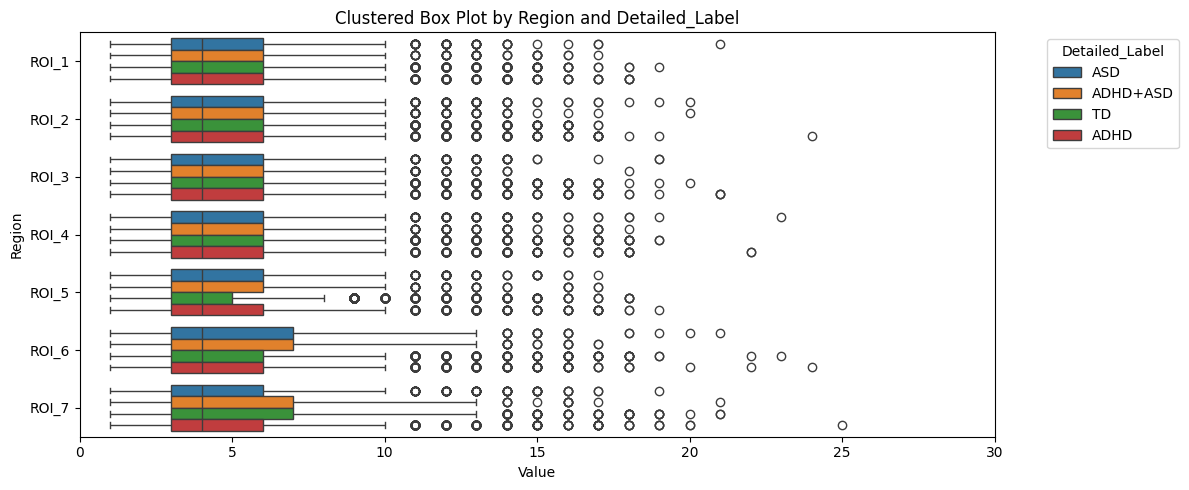

In [37]:
by = "Label"
# collect all region-time data in a list of dicts
long_data = []

for dataset in tqdm(all_scan_meta[by].unique()):
    cat_df = all_scan_meta[all_scan_meta[by] == dataset]
    
    # Flatten and append to long_data
    for row in cat_df["Region Dwell"]:
        for region, values in row.items():
            for v in values:
                long_data.append({
                    "Region": region,
                    "Value": v,
                    "Detailed_Label": dataset
                })

# Convert to DataFrame
df_long = pd.DataFrame(long_data)
# Plot
plt.figure(figsize=(12, 5))
sns.boxplot(data=df_long, y="Region", x="Value", hue="Detailed_Label",orient='h')
plt.xlim(0, 30)
plt.title("Clustered Box Plot by Region and Detailed_Label")
plt.legend(title="Detailed_Label", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


['ASD' 'ADHD+ASD' 'TD' 'ADHD']


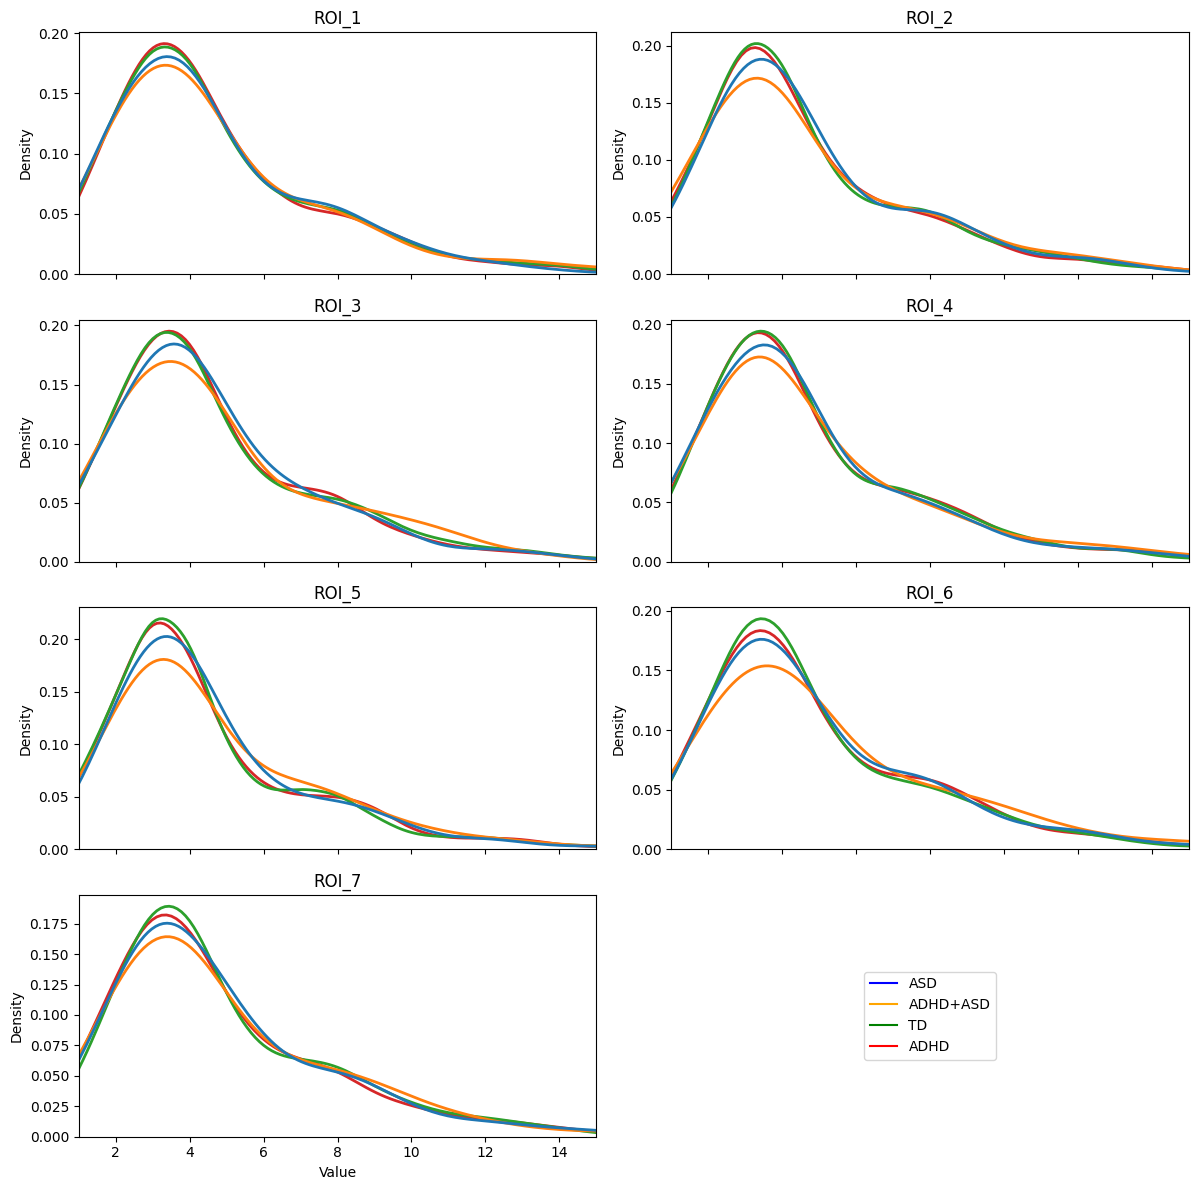

In [38]:

regions = sorted(df_long["Region"].unique())
n_regions = len(regions)

ncols = 2
nrows = int(np.ceil(n_regions / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, nrows * 3), sharex=True)
axes = axes.flatten()

# For storing handles/labels from the first plot
legend_handles = None
legend_labels = None
for i, region in enumerate(regions):
    ax = axes[i]
    subset = df_long[df_long["Region"] == region]

    # For the first plot, allow legend temporarily to get handles and labels
    plot = sns.kdeplot(
        data=subset,
        x="Value",
        hue="Detailed_Label",
        ax=ax,
        common_norm=False,
        fill=False,
        linewidth=2,
        bw_adjust=1.3,
        clip=(1, None),
        legend=False # legend only on first plot
    )

    ax.set_title(region)
    ax.set_xlim(1, 15)


# Put legend on the first unused subplot (if any)
if len(regions) < len(axes):
    legend_ax = axes[len(regions)]
    legend_ax.axis("off")  # Hide axes
    handles = []
    categories = df_long.Detailed_Label.unique()
    print(categories)
    for x,c in enumerate(["blue","orange","green","red"]):
        handle = mlines.Line2D([], [],color=c, label=categories[x])
        handles.append(handle)
    legend_ax.legend(handles=handles,loc = "center")
    #legend_ax.legend(handles,title="Label", loc="center")

# Hide any *remaining* unused axes
for j in range(len(regions) + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [39]:
list(all_scan_meta["Binarised"][0].columns)

['ROI_1', 'ROI_2', 'ROI_3', 'ROI_4', 'ROI_5', 'ROI_6', 'ROI_7']

### region mean and vars scatters by dataset

ASD
ADHD+ASD
TD
ADHD


C:\Users\nici9\AppData\Local\Temp\ipykernel_6212\3059526805.py:25: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax[x].set_xbound(50)
C:\Users\nici9\AppData\Local\Temp\ipykernel_6212\3059526805.py:27: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax[x].set_ybound(10)


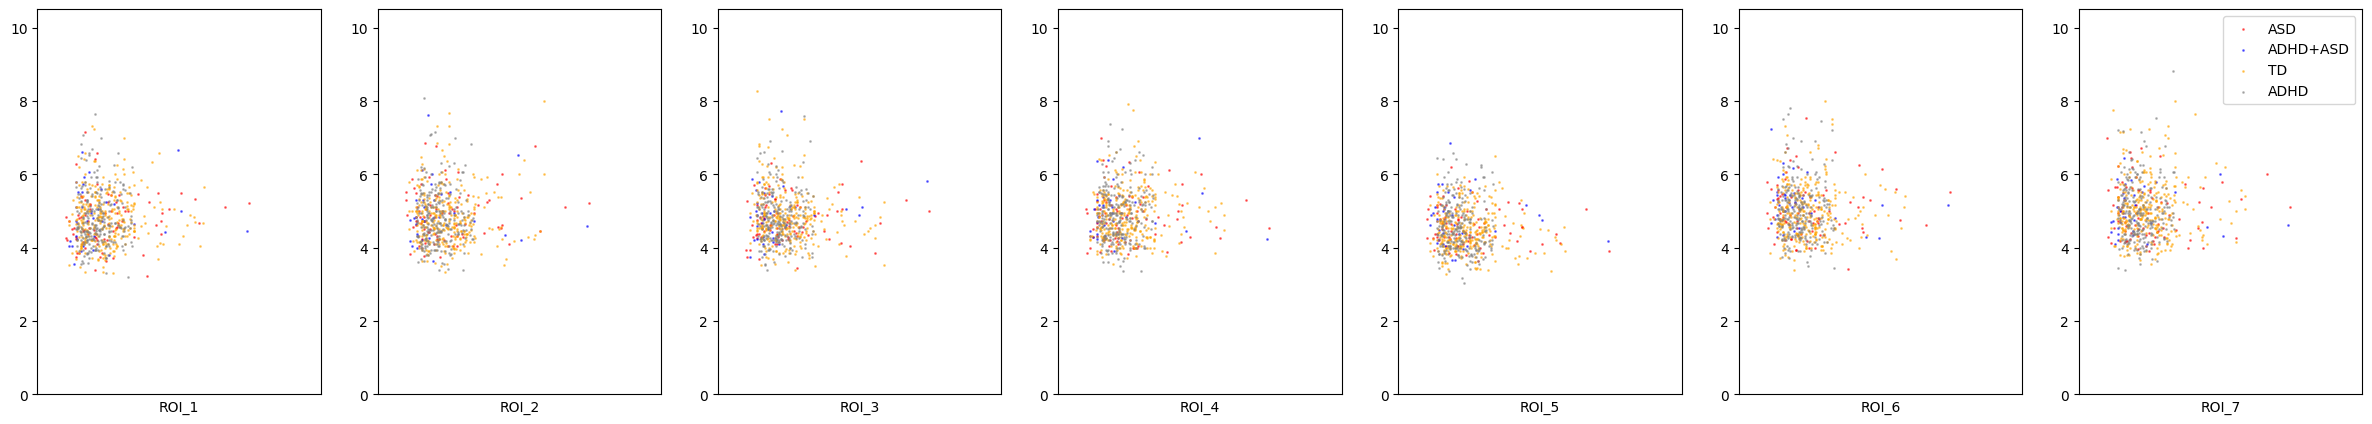

In [40]:
by = "Label"
colours = ["Red","Blue","Orange","Grey"]
ages = {i:list() for i in all_scan_meta[by].unique()}

fig,ax = plt.subplots(1,7,figsize = (30,5))
mean_means =[]
for x_d,dataset in enumerate(all_scan_meta[by].unique()):
    print(dataset)
    cat_df = all_scan_meta[all_scan_meta[by] == dataset].copy()
    regions = list(all_scan_meta["Binarised"][0].columns)
    ROI_dict = {i:list() for i in regions}
    for age in cat_df["Age"]:
        ages[dataset].append(age)
    for row in cat_df["Region Dwell"]:
        for region,values in row.items():
            ROI_dict[region].append(np.mean(values))
            #print(values)
            #print(row)



    for x,region in enumerate(ROI_dict.keys()):
        ax[x].scatter(ages[dataset],ROI_dict[region],s=1,alpha=0.5,c = colours[x_d],label = dataset)
        mean_means.append([dataset,region,np.mean(ROI_dict[region]),np.var(ROI_dict[region])])
        ax[x].set_xbound(50)
        ax[x].set_xlim(0)
        ax[x].set_ybound(10)
        ax[x].set_ylim(0)
        ax[x].set_xlabel(region)
        if x!=7:
            ax[x].set_xticks([])
plt.legend()
plt.show()
mean_means = pd.DataFrame(mean_means)


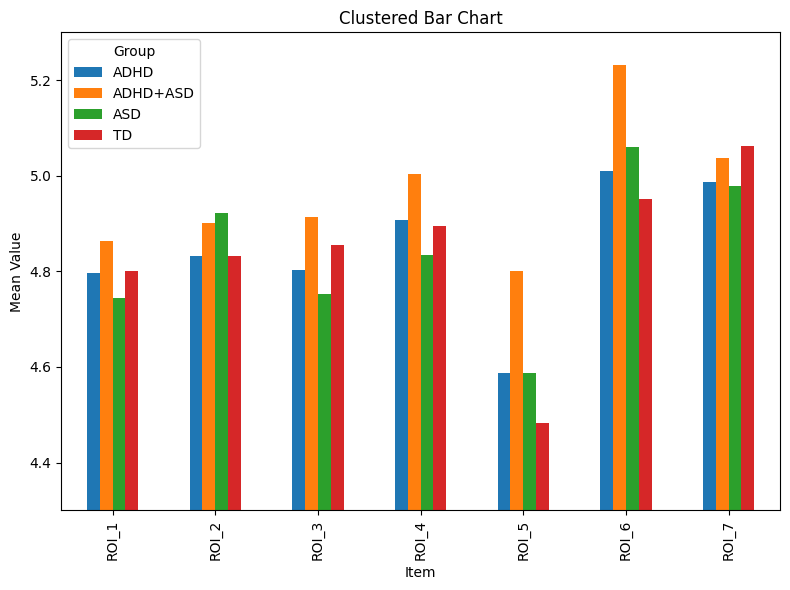

In [41]:
mean_means.columns = ['Group', 'Item', 'Mean','Var']

# Pivot the data for clustering
pivot_df = mean_means.pivot(index='Item', columns='Group', values='Mean')

# Create plot
pivot_df.plot(kind='bar', figsize=(8, 6), ylim=(4.3, 5.3))

plt.title('Clustered Bar Chart')
plt.ylabel('Mean Value')
plt.xlabel('Item')
plt.legend(title='Group')
plt.tight_layout()
plt.show()

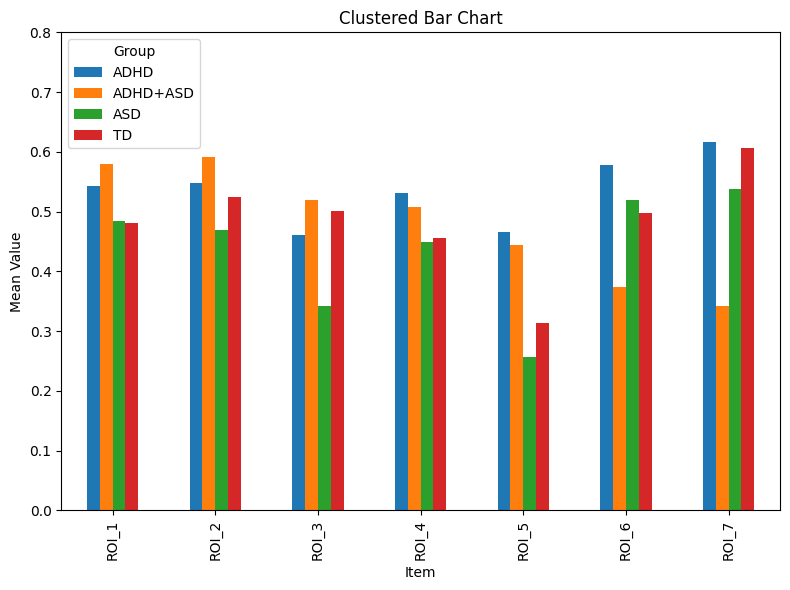

In [42]:
# Pivot the data for clustering
pivot_df = mean_means.pivot(index='Item', columns='Group', values='Var')

# Create plot
pivot_df.plot(kind='bar', figsize=(8, 6), ylim=(0,0.8))

plt.title('Clustered Bar Chart')
plt.ylabel('Mean Value')
plt.xlabel('Item')
plt.legend(title='Group')
plt.tight_layout()
plt.show()

In [ ]:
#all_scan_meta df contains all the region dwell data

,Sub ID,Age,Sex,IQ,Diagnosis,Co-Diagnosis,Dataset,Detailed_Label,Label,Participant,Binarised,Dataset_r,Region Dwell,Region Dwell Summary,Scans
0,50952,8.74,Female,134,ASD,<NA>,ABIDEI,Pure+ASD,ASD,50952,ROI_1 ROI_2 ROI_3 ROI_4 ROI_5 ROI_6 ...,ABIDEI_7,"{'ROI_1': [3, 5, 3, 4, 2, 1, 8, 5, 9, 5, 7, 11...",ROI Mean Var 0 ROI_1 4.8888...,1
1,50953,11.764,Female,132,ASD,ADHD,ABIDEI,ADHD+ASD,ADHD+ASD,50953,ROI_1 ROI_2 ROI_3 ROI_4 ROI_5 ROI_6 ...,ABIDEI_7,"{'ROI_1': [3, 3, 5, 13, 2, 5, 4, 9, 4, 3, 8, 2...",ROI Mean Var 0 ROI_1 5.6000...,1
2,50954,14.75,Female,78,ASD,<NA>,ABIDEI,Pure+ASD,ASD,50954,ROI_1 ROI_2 ROI_3 ROI_4 ROI_5 ROI_6 ...,ABIDEI_7,"{'ROI_1': [3, 4, 2, 8, 2, 4, 2, 9, 7, 2, 3, 10...",ROI Mean Var 0 ROI_1 4.5789...,1
3,50956,14.06,Female,115,ASD,<NA>,ABIDEI,Pure+ASD,ASD,50956,ROI_1 ROI_2 ROI_3 ROI_4 ROI_5 ROI_6 ...,ABIDEI_7,"{'ROI_1': [2, 3, 3, 3, 5, 2, 6, 2, 2, 2, 3, 2,...",ROI Mean Var 0 ROI_1 3.70833...,1
4,50957,14.75,Female,79,ASD,<NA>,ABIDEI,Pure+ASD,ASD,50957,ROI_1 ROI_2 ROI_3 ROI_4 ROI_5 ROI_6 ...,ABIDEI_7,"{'ROI_1': [4, 5, 8, 3, 3, 7, 3, 5, 5, 4, 4, 10...",ROI Mean Var 0 ROI_1 4.9411...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,9578663,8.26,Female,134,TD,<NA>,ADHD200,Pure+TD,TD,9578663,ROI_1 ROI_2 ROI_3 ROI_4 ROI_5 ROI_6 ...,ADHD200_7,"{'ROI_1': [1, 1, 4, 8, 9, 2, 2, 2, 5, 3, 4, 2,...",ROI Mean Var 0 ROI_1 4.1000...,2
656,9750701,10.74,Male,113,TD,<NA>,ADHD200,Pure+TD,TD,9750701,ROI_1 ROI_2 ROI_3 ROI_4 ROI_5 ROI_6 ...,ADHD200_7,"{'ROI_1': [9, 4, 4, 3, 5, 3, 4, 4, 4, 1, 8, 4,...",ROI Mean Var 0 ROI_1 4.0476...,2
657,9750701,10.74,Male,113,TD,<NA>,ADHD200,Pure+TD,TD,9750701,ROI_1 ROI_2 ROI_3 ROI_4 ROI_5 ROI_6 ...,ADHD200_7,"{'ROI_1': [2, 7, 2, 6, 3, 2, 4, 5, 3, 3, 1, 10...",ROI Mean Var 0 ROI_1 4.1875...,2
658,9907452,9.98,Male,132,ADHD,Other,ADHD200,Other+ADHD,ADHD,9907452,ROI_1 ROI_2 ROI_3 ROI_4 ROI_5 ROI_6 ...,ADHD200_7,"{'ROI_1': [4, 4, 8, 2, 2, 2, 9, 4, 3, 5, 2, 1,...",ROI Mean Var 0 ROI_1 3.8947...,2
